# K-Nearest Neighbors in depth. Breast Cancer dataset




In this task we are going to perform a full analysis of the breast cancer datatset provided by scikit learn followed by the implementation of K-Nearest neighbors model to predict the output of the type of cancer given some pacient data.
The K-Nearest neighbors model is going to be trained in diferent ways so that we can see wich one give us the best results.


#### 1) Describe the dataset in dimensions such as number of features, number of categories, and number of samples per category using Python. 

- First we are going to import some of the libraries that we are going to use to perform the excercice. 


In [171]:
# =============================================================================
# libraries
# =============================================================================

import numpy as np
import seaborn as sns
import collections
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

- Now that we have imported the libraries we are going to import the dataset and we are going to perform a first analysis and visulization of the number of features, number of clases and number of samples by categories.

In [172]:
from sklearn.datasets import load_breast_cancer
Breast_Cancer = load_breast_cancer()
X = Breast_Cancer.data
y = Breast_Cancer.target
columns = Breast_Cancer.feature_names

In the 'X' variable we have the features of the dataset and in the 'y' variable we have the output given the features of the 'X' data
Lest see the size of both of them

In [173]:
X.shape


(569, 30)

In [174]:
y.shape

(569,)

We can see that the features variable has a total of 30 features and a length of 569 pacients, as it was expected we have 569 solutions for each pacient in the output variable.

- Now we are going to check the output of the dataset, that means the kind of class we are going to find in the output and how many samples are for each of them


In [175]:
print("Examples for each class: ", collections.Counter(y) )

Examples for each class:  Counter({1: 357, 0: 212})


C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

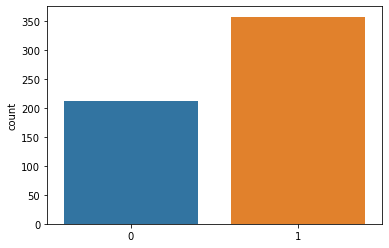

In [176]:
sns.countplot(y)

We can see that there are 357 persons in our dataset that has a 1 type of classifications, wich means that have bening cancer. In the other hand we have 212 pacients that have a 0 output wich means malign type of cancer. 
In conclusion we could say that we dont have a really well balanced class so maybe the stratified k fold kind of validation could be our best choice.

#### 2) Represent the statistical support of every feature graphically, resorting to Matplotlib’s boxplot function. Are there any outliers that can be detected by simple visual inspection? If so, devise a handcrafted method to detect and isolate such examples.

- Having clear wich is the main structure of our dataset, we are going to represent the statatistical support of every feature using Matplotlib´s boxplot function

{'whiskers': [<matplotlib.lines.Line2D at 0x1927169f370>,
 'caps': [<matplotlib.lines.Line2D at 0x1927169fa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x19271689fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x192716aa130>,
 'fliers': [<matplotlib.lines.Line2D at 0x192716aa490>,
 'means': []}

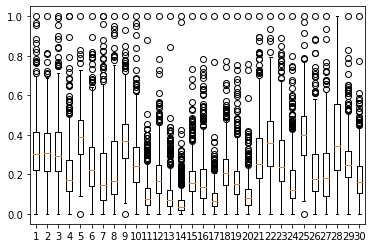

In [266]:
plt.boxplot(X)

By giving a first look to the boxplot output the first thing that comes to mind is that it is not well scaled so lest scale it so we can get more information.

In [178]:
from sklearn.preprocessing import MinMaxScaler

miScaler = MinMaxScaler()
X = miScaler.fit_transform(X)

{'whiskers': [<matplotlib.lines.Line2D at 0x1926e098f70>,
 'caps': [<matplotlib.lines.Line2D at 0x1926e0ab670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1926e098c10>,
 'medians': [<matplotlib.lines.Line2D at 0x1926e0abd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x1926e0b90d0>,
 'means': []}

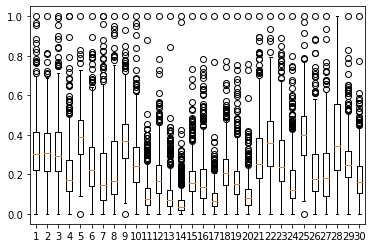

In [179]:
plt.boxplot(X)

By looking at the boxplot we could think that there are a lot of outliers, in order to try and detect them we are going to perfomr the IRQ method that uses de first and third percentile to isolate the outliers. 
By doing this it does not mean that the outliers we detect has to be outliers because we dont have information about wich kind of value we can find in the dataset.
We dont really know if a value of 1.5 is an outlier for the feature number 22 for example, we could think it is an outlier but maybe it is a key value to determine the type of cancer, so in order to eliminate the outliers with a good knowledge we would have to ask someone that knows the values and that can explain us the range in the value we have in each feature.

In [180]:
# In order to operate with the data we are going to use dataframes
cancer_df = pd.DataFrame(X)
cancer_df.columns = columns
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [181]:
# get the shape of the cancer dataframe
cancer_df.shape

(569, 30)

- IRQ method for outlier detection

In [182]:
# get first Q
Q1 = cancer_df.quantile(0.25)
# get third Q
Q3 = cancer_df.quantile(0.75)
# get IRQ value for every feature
IQR = Q3 - Q1
print(IQR)

mean radius                0.193100
mean texture               0.190396
mean perimeter             0.199917
mean area                  0.153722
mean smoothness            0.170895
mean compactness           0.200847
mean concavity             0.236973
mean concave points        0.266849
mean symmetry              0.170707
mean fractal dimension     0.177338
radius error               0.089263
texture error              0.141465
perimeter error            0.082505
area error                 0.051065
smoothness error           0.101200
compactness error          0.145477
concavity error            0.068081
concave points error       0.133965
symmetry error             0.117071
fractal dimension error    0.079806
worst radius               0.205621
worst texture              0.230277
worst perimeter            0.205638
worst area                 0.139771
worst smoothness           0.194149
worst compactness          0.186182
worst concavity            0.214377
worst concave points       0

In [183]:
# print outliers in the dataframe
print((cancer_df < (Q1 - 1.5 * IQR)) |(cancer_df > (Q3 + 1.5 * IQR)))

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          False         False           False      False            False   
1          False         False           False      False            False   
2          False         False           False      False            False   
3          False         False           False      False             True   
4          False         False           False      False            False   
..           ...           ...             ...        ...              ...   
564        False         False           False       True            False   
565        False         False           False      False            False   
566        False         False           False      False            False   
567        False         False           False      False            False   
568        False         False           False      False             True   

     mean compactness  mean concavity  mean concave points  mea

In [184]:
# get the outliers in a different dataset
cancer_outliers = cancer_df[((cancer_df < (Q1 - 1.5 * IQR)) |(cancer_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [185]:
cancer_outliers.shape

(171, 30)

In [186]:
# get the original dataset without the outliers
cancer_df_out = cancer_df[~((cancer_df < (Q1 - 1.5 * IQR)) |(cancer_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [187]:
cancer_df_out.shape

(398, 30)

- In order to keep visualizing the data we are going to analyce how each feature affects to the diagnosis.

First we are going to add the 'y' variable with the type of cancer to the features dataset

In [188]:
df_cancer_corr = cancer_df

In [189]:
df_cancer_corr['Diagnosis'] = y 
df_cancer_corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,0
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,0


In [190]:
# Now lets get the correlation by looking at the Diagnosis column
df_cancer_corr.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


We can see how negative values affects in a negative way the type of the diagnosis, a positive value affects in apositive wat in the diagnosis and a 0 value does not affect the diagnosis.

<AxesSubplot:>

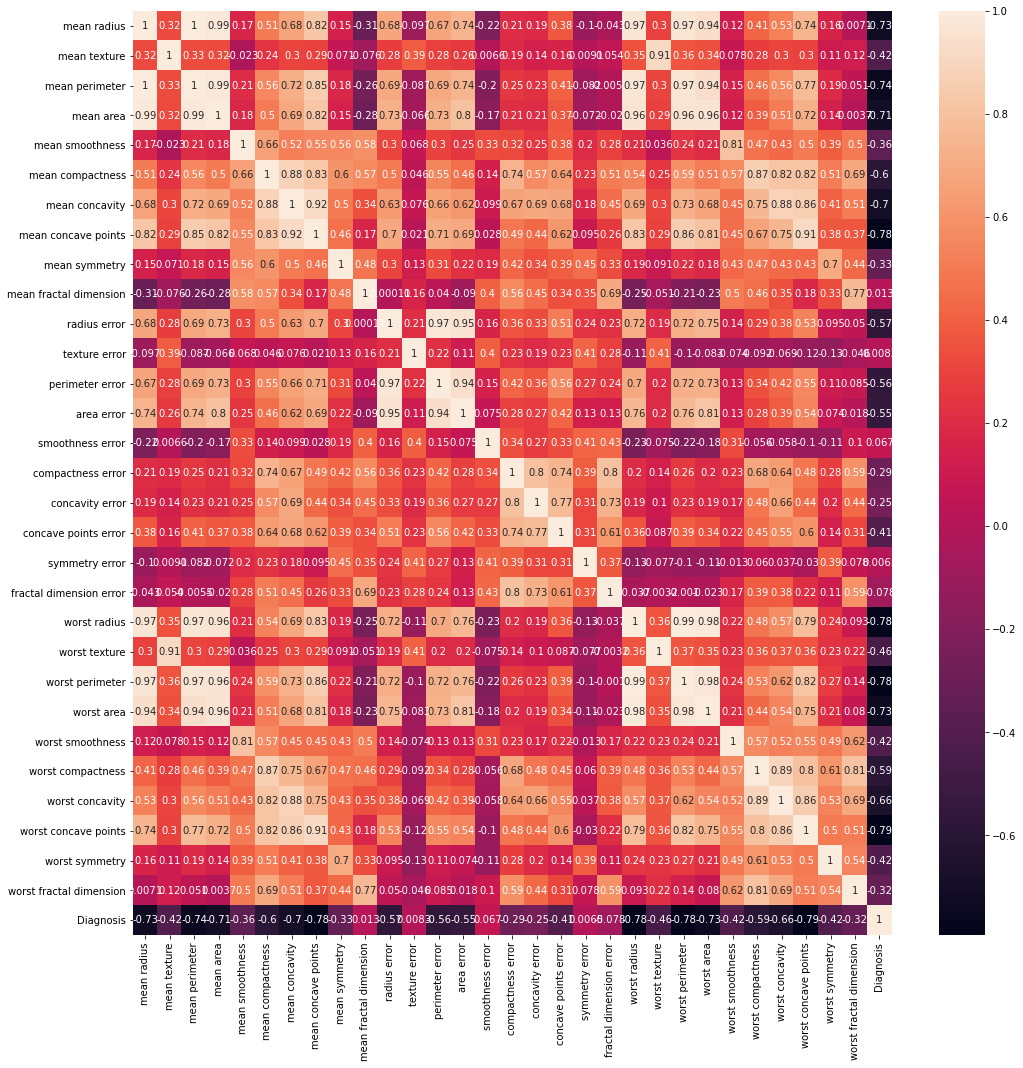

In [192]:
plt.figure(figsize=(17,17))
sns.heatmap(df_cancer_corr.corr(),annot=True)

#### 3) Repeat each of the experiments seen in class with the K-Nearest Neighbors model, providing arguments for each of the steps taken along the process, and commenting on the partial results obtained with the selected dataset. Please use as many performance metrics as needed to illustrate the particularities of the selected dataset (e.g. imbalanced classes).

Now let's use K-Neighbors model to classify and predict each sample of our dataset. First of all, is required the dataset split into train and test data. To do that, it is posisble to use the train_test_split model or the StratifiedShuffleSplit one. The StratifiedShuffleSplit model is used when the distribution of examples across the classes is not equal (imbalanced classes). In other words, an imbalance occurs when one or more classes have very low proportions in the training data as compared to the other classes. We are going to use both of them to see wich one is better.

We are also goint to see the cross validation method seen in class.

# K-Nearest using K-Fold (Not stratified)

In [287]:
KF = KFold(n_splits = 5)
n_vecinos = 5

In [284]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in KF.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [285]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")


ejemplos para cada clase:  Counter({1: 270, 0: 186})
Acierto:  [93.85964912280701, 98.24561403508773, 96.49122807017544, 98.24561403508773, 94.69026548672566] %
Acierto:  96.30647414997671 %


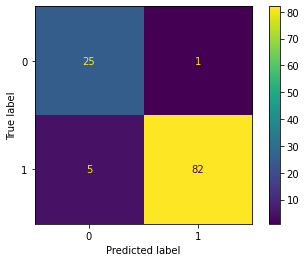

In [286]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

Just by doing a K-flod validation followed by a KNN model we can see that the acuraccy is very good even tho the data is not balanced.
Lest see if we can make it better with stratified k-fold validation.

# K-Nearest using Strattified Shuffle Split (Stratified K-Fold)

This training method is normaly used for unbalanced data

##### n_splits = 10 n_vecinos = 5 

In [197]:
# First we create the splits we want for the training of the dataset and the number of neighbors for the KNN model 
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.1,random_state=0)
n_vecinos = 5

In [198]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [199]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")


ejemplos para cada clase:  Counter({1: 321, 0: 191})
Acierto:  [92.98245614035088, 96.49122807017544, 98.24561403508773, 100.0, 92.98245614035088, 98.24561403508773, 98.24561403508773, 98.24561403508773, 92.98245614035088, 98.24561403508773] %
Acierto:  96.66666666666667 %


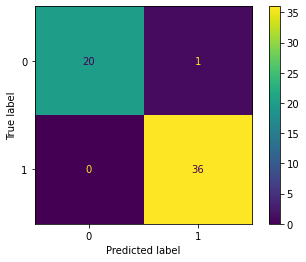

In [200]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

##### n_splits = 10 n_vecinos = 3 

In [201]:
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.1,random_state=0)
n_vecinos = 3

In [202]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [203]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")


ejemplos para cada clase:  Counter({1: 321, 0: 191})
Acierto:  [94.73684210526316, 94.73684210526316, 98.24561403508773, 100.0, 91.2280701754386, 98.24561403508773, 96.49122807017544, 98.24561403508773, 92.98245614035088, 98.24561403508773] %
Acierto:  96.3157894736842 %


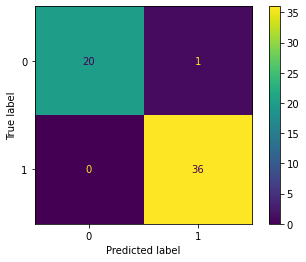

In [204]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

##### n_splits = 10 n_vecinos = 15

In [205]:
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.1,random_state=0)
n_vecinos = 15

In [206]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [207]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")


ejemplos para cada clase:  Counter({1: 321, 0: 191})
Acierto:  [96.49122807017544, 96.49122807017544, 100.0, 98.24561403508773, 94.73684210526316, 98.24561403508773, 96.49122807017544, 98.24561403508773, 96.49122807017544, 98.24561403508773] %
Acierto:  97.36842105263159 %


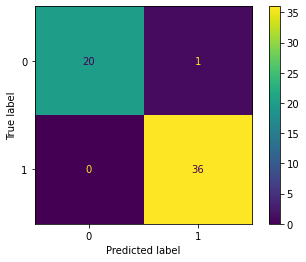

In [208]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

##### n_splits = 5 n_vecinos = 15

In [209]:
sss = StratifiedShuffleSplit(n_splits=5,test_size=0.1,random_state=0)
n_vecinos = 15

In [210]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [211]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")

ejemplos para cada clase:  Counter({1: 321, 0: 191})
Acierto:  [96.49122807017544, 96.49122807017544, 100.0, 98.24561403508773, 94.73684210526316] %
Acierto:  97.19298245614036 %


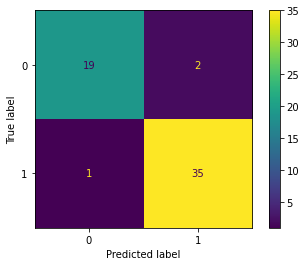

In [212]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

##### n_splits = 3 n_vecinos = 3

In [213]:
sss = StratifiedShuffleSplit(n_splits=3,test_size=0.1,random_state=0)
n_vecinos = 3

In [214]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [215]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")

ejemplos para cada clase:  Counter({1: 321, 0: 191})
Acierto:  [94.73684210526316, 94.73684210526316, 98.24561403508773] %
Acierto:  95.90643274853801 %


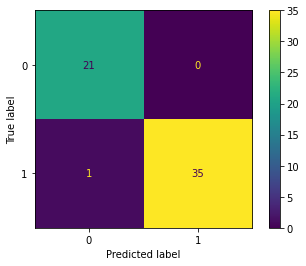

In [216]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

**Conclusion**


In almost every combination of the stratified k-fold validation we can get a better accuracy that the one we got with using only k-fold validation.

K-Fold validation 96.306 %


Stratified K-Fold validation 97.368 %



# K-Nearest using Cross Validation

In this case we are going to use the cross validation 

In [325]:
# we create one strat for the cross validation because the data is unbalanced 
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=13)

In [326]:
# we set the train test split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [327]:
# we set some diferent neighbors values so that the gridsearch method can find the most apropied
params =  {'n_neighbors' : [3,5,9,11,13]}

In [328]:
# the grid serach cross validation tries every combination of the params we give to the method. In this case we are just giving 
# the number of nearest neighbors for the KNN but in the following paragrafs we will use some more.
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
gs = GridSearchCV(estimator=clf,param_grid=params,scoring='accuracy',cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 11, 13]}, scoring='accuracy')

In [329]:
resultsCV = gs.cv_results_
# we get the best convination of the grid search
clfBest = gs.best_estimator_
# we train the model with the best convination
clfBest.fit(X_train,y_train)
# we predict the value separated in the train test fase
y_pred = clfBest.predict(X_test)

In [330]:
#printing the best combination of parameters
gs.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [222]:
from sklearn.metrics import accuracy_score
# We print now the accuracy score of the model
print(accuracy_score(y_test, y_pred))

0.9649122807017544


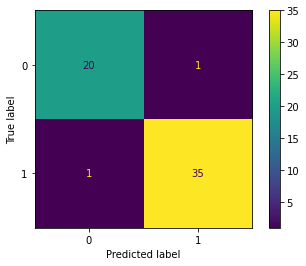

In [223]:
from sklearn.metrics import plot_confusion_matrix
# now we print the confision matrix
plot_confusion_matrix(clfBest,X_test,y_test)

In [224]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))

ejemplos para cada clase:  Counter({1: 321, 0: 191})


We can see that the y_train as well as the y variable is unbalanced 

- #### Precision score : it indicates how accurate the positive predictions are 

In [296]:
from sklearn.metrics import precision_score
# printing precision score
print('precision score is: ',precision_score(y_test, y_pred))

precision score is:  0.9879518072289156


- #### Recall score : it is thhe coverage of actual positive samples 

In [291]:
from sklearn.metrics import recall_score
# printing recall score
print('recall score is: ',recall_score(y_test, y_pred))

recall score is:  0.9425287356321839


- #### Hybrid metric, usefull for unbalanced classes as it happens in this case 

In [292]:
from sklearn.metrics import f1_score
# printing f1 score
print('f1 score is: ',f1_score(y_test, y_pred))

f1 score is:  0.9647058823529412


**Conclusion**


As it was to be spected because of the unbalanced class we get a better result by using stratified k-fold validation

K-Fold validation 96.306 %


Stratified K-Fold validation 97.368 %

Cross validation 96.491%

#### 4) Read the Scikit-learn library documentation and configure the automated validation script so that the GridSearchCV() function uses leave-one-out cross-validation instead of k-fold. Which conclusions can be drawn from the mean cross-validation scores and the test scores using a k-neighbor model with optimized k?

# K-Nearest Neighbors using leave one out cross validation

- In this case we are going to do a cross validation but using leave one out instead of the k-fold method

In [318]:
# we import the leave one out method
from sklearn.model_selection import LeaveOneOut
LOO = LeaveOneOut()

In [319]:
# we create one strat for the cross validation because the data is unbalanced 
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=13)

In [320]:
# we set the train test split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [321]:
# get the bests neighbors param for grid search
params =  {'n_neighbors' : [3,5,9,11,13]}

In [322]:
clf = KNeighborsClassifier()
# to use the Leave one out validation we have to set it in the cv of the grid search
gs = GridSearchCV(estimator=clf,param_grid=params,scoring='accuracy',cv=LOO)
gs.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 11, 13]}, scoring='accuracy')

In [323]:
resultsCV = gs.cv_results_
# we get the best combination
clfBest = gs.best_estimator_
# we train with the best combination
clfBest.fit(X_train,y_train)
# we predict with the resulting training
y_pred = clfBest.predict(X_test)

In [231]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9649122807017544


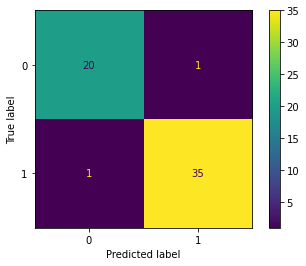

In [232]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)


**Conclusions:**

LeaveOneOut results are the same as the cross-validation results with optimized k (K=11).In both we get a 96.491% accuracy.

#### 5) Elaborate on the need for stratifying the cross-validation process analyzing the distribution of samples by class. If so, please show with empirical evidence what could occur if such a stratification was not performed, specially when decreasing the number of samples of the dataset.

# KNN method with not stratified cross validation

In [331]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=0)

In [332]:
params =  {'n_neighbors' : [3,5,9,11,13]}

In [333]:
clf = KNeighborsClassifier()

gs = GridSearchCV(estimator=clf,param_grid=params,scoring='accuracy',cv=5)

gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 11, 13]}, scoring='accuracy')

In [334]:
resultsCV = gs.cv_results_

#cogemos la mejor combinacion
clfBest = gs.best_estimator_

#entreno con la mejor combinacion
clfBest.fit(X_train,y_train)

#predigo con este entrenamiento
y_pred = clfBest.predict(X_test)

In [335]:
#printing the best combination of parameters
clfBest

KNeighborsClassifier(n_neighbors=11)

In [336]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9385964912280702


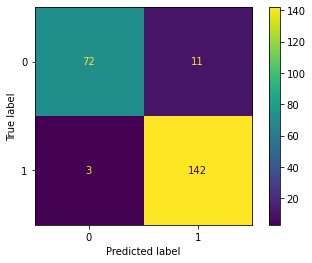

In [238]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

**Conclusion**

Not stratified = 93.8596% accuracy (k=11)


stratified = 96.4912% accuracy (k=11)

As we could predict by using not stratiffied cross validation we get a worst result this is because the clases are not balanced and if we dont stratiffy our data the model migth not be getting a adecuate number of data for both classes. the results could be even worst if we decreased the amount of data we have abaliable because the test train split could be even more unbalanaced.


#### 6) Include in the set of hyper-parameters adjusted via cross-validation process the weights of the distance metric between samples according to the “weights” parameter of the model in Scikit-learn. Compute the model’s performance when distance metric weights are fine-tuned within cross-validation with respect to only tuning the number of neighbors (K).



# KNN using cross validation adding weights

To solve this section we only have to compare the model accuracy using GridSearchCV without an 'uniform' in 'weights' parameter with the accuracy using 'distance' in 'weights' parameter. 

In [424]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=13)

In [425]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [426]:
params =  {'n_neighbors' : [3,5,9,11,13], 'weights' : ['uniform','distance']}

In [427]:
clf = KNeighborsClassifier()

gs = GridSearchCV(estimator=clf,param_grid=params,scoring='accuracy',cv=5)

gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [428]:
resultsCV = gs.cv_results_

#cogemos la mejor combinacion
clfBest = gs.best_estimator_

#entreno con la mejor combinacion
clfBest.fit(X_train,y_train)

#predigo con este entrenamiento
y_pred = clfBest.predict(X_test)

In [429]:
#printing the results
gs.cv_results_


{'mean_fit_time': array([0.00180807, 0.00120029, 0.00160022, 0.00140047, 0.0010179 ,
        0.00100055, 0.00161805, 0.0010006 , 0.00100088, 0.00100079]),
 'std_fit_time': array([7.57968003e-04, 3.99424905e-04, 4.89163984e-04, 4.90563478e-04,
        3.55966524e-05, 1.37871097e-06, 5.05751024e-04, 1.10189629e-06,
        5.43678010e-07, 1.17383324e-06]),
 'mean_score_time': array([0.00479088, 0.00219765, 0.0041997 , 0.00199885, 0.00394917,
        0.00253053, 0.00404444, 0.00273204, 0.0050622 , 0.002529  ]),
 'std_score_time': array([1.15381204e-03, 3.99639854e-04, 4.01520910e-04, 9.46494734e-07,
        9.93014956e-05, 4.52275970e-04, 3.57640730e-04, 3.89546016e-04,
        8.00323407e-05, 4.52107076e-04]),
 'param_n_neighbors': masked_array(data=[3, 3, 5, 5, 9, 9, 11, 11, 13, 13],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['unifo

In [430]:
#printing the best combination of parameters
print(gs.best_estimator_)

KNeighborsClassifier(n_neighbors=11)


In [431]:
gs.best_params_

{'n_neighbors': 11, 'weights': 'uniform'}

In [432]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9649122807017544


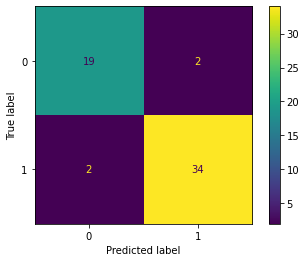

In [423]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

**Conclusions:**

the model's performance for an optimal number of neighbors (k = 11) is 96.4912% the same as when we dident specify the weigth pararm, this is because the uniform value is the defalt one and the params selected where 'n_neighbors': 11, 'weights': 'uniform'

#### 7) Following the same approach as in the last section, enter the type of distance metric (“metric” parameter) within the cross-validation process. Evaluates the results and gains / losses of generalizability of the model.

# KNN cross validation adding weights and metrics

In [441]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=13)

In [442]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [443]:
params =  {'n_neighbors' : [3,5,9,11,13], 'weights' : ['uniform','distance'],'p' : [1,2,3,4]}

In [444]:
clf = KNeighborsClassifier()

gs = GridSearchCV(estimator=clf,param_grid=params,scoring='accuracy',cv=5)

gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 11, 13], 'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [445]:
resultsCV = gs.cv_results_

#cogemos la mejor combinacion
clfBest = gs.best_estimator_

#entreno con la mejor combinacion
clfBest.fit(X_train,y_train)

#predigo con este entrenamiento
y_pred = clfBest.predict(X_test)

In [446]:
gs.cv_results_

{'mean_fit_time': array([0.00157652, 0.00198932, 0.00140462, 0.00159359, 0.00119948,
        0.00171695, 0.00140777, 0.00100083, 0.00122137, 0.00152974,
        0.00142975, 0.00151448, 0.00159841, 0.00160027, 0.00139351,
        0.00141087, 0.00119958, 0.00120826, 0.00099974, 0.00180154,
        0.00118828, 0.00159416, 0.00139985, 0.00139198, 0.00119982,
        0.00139322, 0.00101414, 0.00138693, 0.00161271, 0.00159907,
        0.00139403, 0.00140109, 0.00140042, 0.00140657, 0.00140104,
        0.0015759 , 0.00120101, 0.00192952, 0.00160751, 0.00141339]),
 'std_fit_time': array([4.87911109e-04, 6.38751850e-04, 4.83464783e-04, 4.84695648e-04,
        4.00785872e-04, 3.92542752e-04, 8.05532368e-04, 3.47600879e-06,
        2.73688553e-04, 6.82239093e-04, 3.86906017e-04, 4.49259775e-04,
        4.87787036e-04, 4.90076775e-04, 4.81094509e-04, 4.88002440e-04,
        4.01009946e-04, 3.95943634e-04, 1.12234137e-06, 3.97467681e-04,
        3.91112057e-04, 4.96844883e-04, 4.86892176e-04, 4.956

In [447]:
gs.best_params_

{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

In [448]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9649122807017544


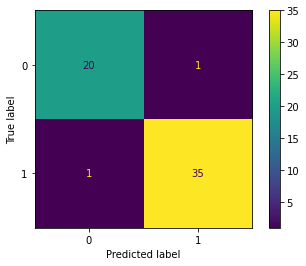

In [449]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

**Conslusion**

By adding the metric value we got to the same accurcy as in the past result by decreasing the k values for the neighbors.

The result now is 96.4912% and the params selected 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'. So we could say that it was succesfull for us to include param value to decrease the number of neighbors.